In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
#sns.set_style("darkgrid")
import sklearn

In [23]:
# choose between the normalized or standardized version of the data
air_data_all = pd.read_csv('data_4comp_std_labeled.csv', delimiter=',')

# select only the columns that pca will be used on
cols = ["PM2.5","PM10","NO2","O3"]   
air_data= air_data_all[cols]

#data converted to np array for easier indexing
air_data_np = np.array(air_data)

# colums with the ratings: categories 1,2,3,4
ratings = air_data_all['cat'] 
cat_labels = ["very low air quality", "low air quality", "medium air quality",  "good air quality"]

In [24]:
# calculation of svd
u, s, vh = np.linalg.svd(air_data, 
                         full_matrices=True) 
eigenval, eigenvec = s ** 2, vh

In [25]:
print(vh)

[[-0.53439699 -0.52622558 -0.53376742  0.39063901]
 [-0.37875802 -0.41123258  0.19482816 -0.80589833]
 [-0.19579188 -0.3027146   0.81991876  0.44470512]
 [ 0.72981351 -0.67995461 -0.06976788 -0.01289986]]


In [26]:
print(air_data_np[:,1])

[ 3.26084674  3.26925444  3.03383886 ... -0.59828718 -0.53943328
 -0.64873337]


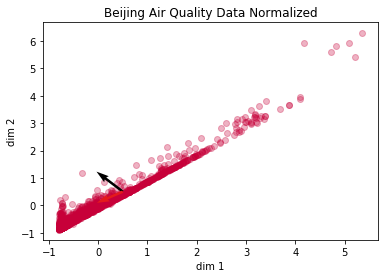

In [27]:
ax = sns.regplot(x=air_data_np[:,0],
            y= air_data_np[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3})

# Draw the Unit EigenVectors
plt.quiver(0.5, 0.5, vh[0,0],vh[3,0], scale_units='xy', angles='xy', scale=1, color = '#000000')
plt.quiver(0.5, 0.5, vh[0,1],vh[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax.set(xlabel='dim 1', 
       ylabel='dim 2',
       title='Beijing Air Quality Data Normalized');

In [28]:
## Calculate the coordinates of the data points in the projection axes of the space spanned 
## by the leading eigenvectors contained in $U$ 
u1 = u[:,0] * s[0] 
u2 = u[:,1] * s[1] 
u3 = u[:,2] * s[2]

<BarContainer object of 4 artists>

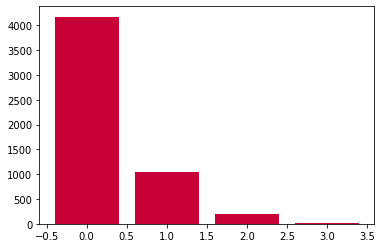

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

# Sort eigenvectors (and -values) by descending order of eigenvalues.
sort = np.argsort(-eigenval)
eigenval = eigenval[sort]
eigenvec = eigenvec[:,sort]

# To get an idea of the eigenvalues we plot them.
figure = plt.figure('Eigenvalue comparison')
plt.bar(np.arange(len(eigenval)), eigenval)

In [30]:
project_data_featureloading = np.dot(air_data, vh.T) # Transpose feature loadings 'vh'
v_norm = np.dot(vh.T,vh)

In [31]:
Us_eig = np.dot(u[:,0:4], np.diag(s)) 

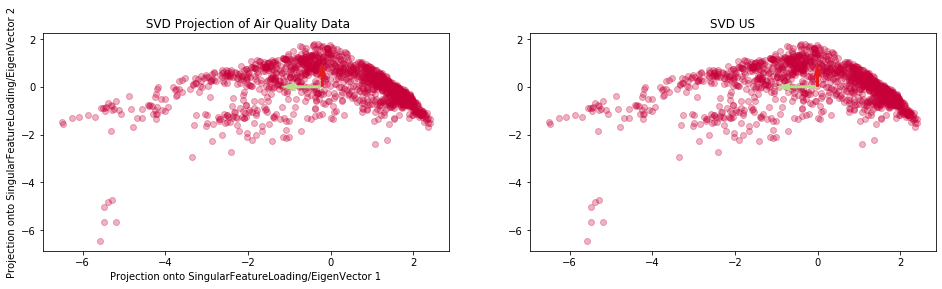

In [32]:
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))

sns.regplot(x= project_data_featureloading[:,0],
            y= project_data_featureloading[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3},ax=ax1)
ax1.quiver(-0.2, 0, -v_norm[0,0], v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#b2df8a') # green arrow
ax1.quiver(-0.2, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c') #red arrow
ax1.set(xlabel='Projection onto SingularFeatureLoading/EigenVector 1', 
       ylabel='Projection onto SingularFeatureLoading/EigenVector 2',
       title=' SVD Projection of Air Quality Data');

sns.regplot(x=Us_eig[:,0],
            y=Us_eig[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3},ax=ax2)
ax2.quiver(0, 0, -v_norm[0,0], v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#b2df8a')
ax2.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax2.set(xlabel='', 
       ylabel='',
       title='SVD US');

Anmerkung der Redaktion: 
- US steht für singular vectors (U) x singular value matrix (S) 
- $U$ contains $r$ **singular vectors** corresponding to the eigenvectors of $XX^\intercal$;
- $S$ is $N \times feature$ matrix with $r \times r$ diagonal submatrix of corresponding **singular values** sorted in the descending order.
- $XV= U S V^\intercal V= U S.$
- -> columns are uncorrelated

## Aber warum sind da auf dem letzten plot die Achsen so komisch? Und wo ist überhaupt der Unterschied zwischen dem linken und rechten plot? 

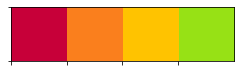

In [33]:
colors = [ "#c70039", "#fa7f1d", "#FFC300" , "#97e115"  ]
sns.set_palette(colors)
sns.palplot(sns.color_palette())

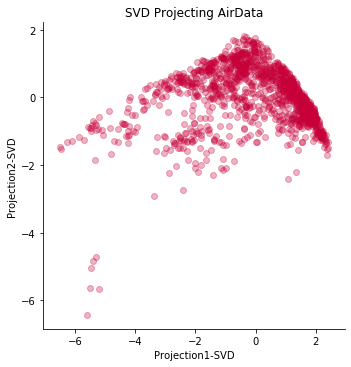

In [34]:
# set data to a Pandas Dataframa to ease plotting
names = ["U_"+str(x+1) for x in range(3)]
names.append('cat')
ds_us = pd.DataFrame(data= np.c_[u1, u2, u3, ratings], 
                     columns=names)

# 1st plot
ax = sns.lmplot('U_1', 
                'U_2', 
                data=ds_us, 
                palette=sns.color_palette("Blues"),
                fit_reg=False,
                scatter_kws={'alpha':0.3});
ax.set(xlabel='Projection1-SVD', 
           ylabel='Projection2-SVD',
           title='SVD Projecting AirData');



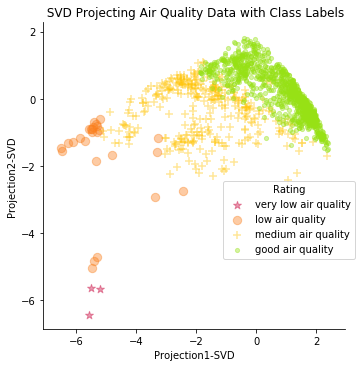

In [35]:
# 2nd plot
ax2 = sns.lmplot('U_1', 
               'U_2', 
               data=ds_us, 
               hue='cat', 
               markers=['*','o', '+','.'],
               palette=sns.color_palette(colors,4),
               fit_reg=False,
               scatter_kws={'alpha':0.4, "s": 70}, 
               legend_out=False);
ax2.set(xlabel='Projection1-SVD', 
       ylabel='Projection2-SVD',
       title=' SVD Projecting Air Quality Data with Class Labels');
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Rating', labels = cat_labels);

In [36]:
# By SVD
projected_x= np.dot(air_data,vh.T)
v_norm= np.dot(vh.T, vh)

#print(projected_x.shape)
#print(labels.shape)
names = ["SVD-PC_"+str(x+1) for x in range(2)]
names.append('cat')
ds_svd = pd.DataFrame(data= np.c_[projected_x[:,0:2], air_data_all.cat], 
                      columns=names)
ds_svd['cat'] = ds_svd['cat'].astype(int)

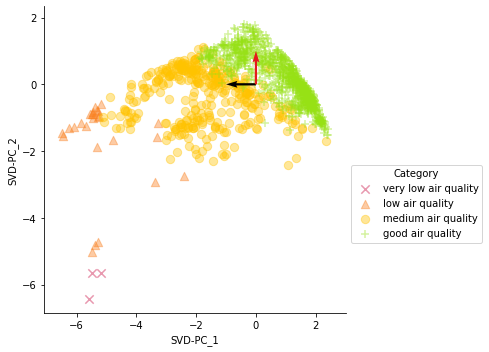

In [37]:
sns.lmplot('SVD-PC_1', 
           'SVD-PC_2', 
           data=ds_svd, 
           hue='cat', 
           markers=['x','^','o','+'],
           fit_reg=False,
           scatter_kws={'alpha':0.4, "s": 70}, 
           legend_out=False, height=5)
plt.quiver(0, 0, -v_norm[0,0],v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#000000')
plt.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
plt.legend(bbox_to_anchor=(1, 0.5), title='Category', labels = cat_labels);

In [38]:
cat4 = ds_us[ds_us["cat"] == 4]
cat3 = ds_us[ds_us["cat"] == 3]
cat2 = ds_us[ds_us["cat"] == 2]
cat1 = ds_us[ds_us["cat"] == 1]


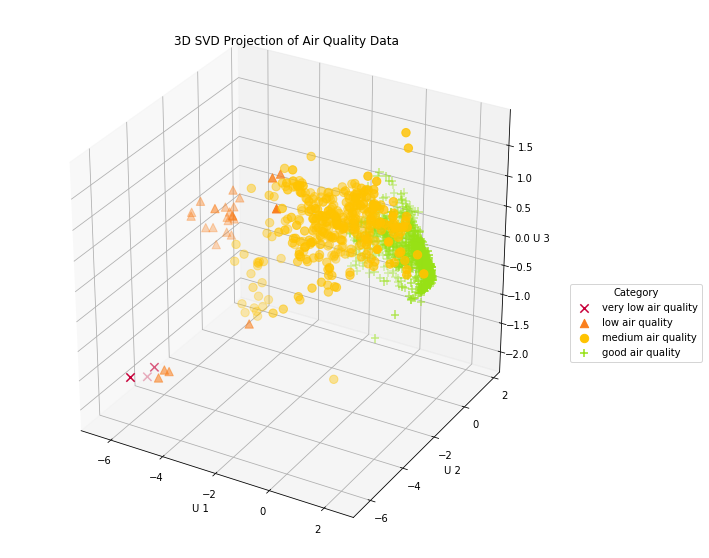

In [54]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cat1["U_1"], cat1["U_2"], cat1["U_3"], s=70, marker='x')
ax.scatter(cat2["U_1"], cat2["U_2"], cat2["U_3"], s=70, marker='^')
ax.scatter(cat3["U_1"], cat3["U_2"], cat3["U_3"], s=70, marker='o')
ax.scatter(cat4["U_1"], cat4["U_2"], cat4["U_3"], s=70, marker='+')

ax.set_xlabel('U 1')
ax.set_ylabel('U 2')
ax.set_zlabel('U 3')
ax.set_title('3D SVD Projection of Air Quality Data');
ax.legend(bbox_to_anchor=(1, 0.5), title='Category', labels = cat_labels);

## Quality of projection

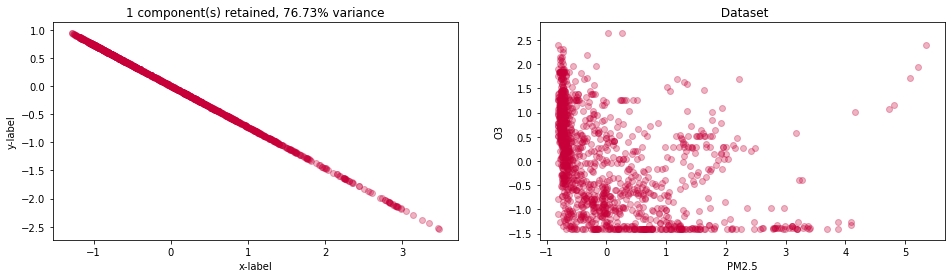

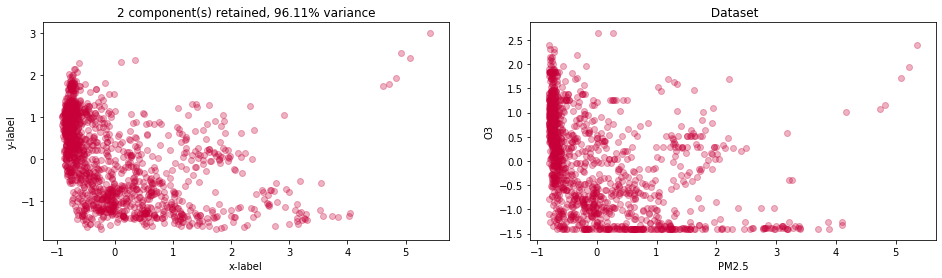

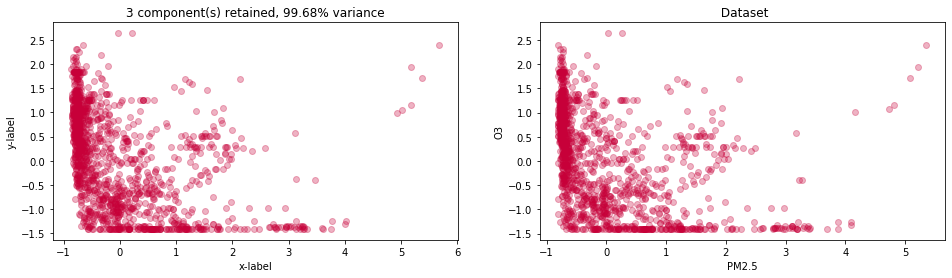

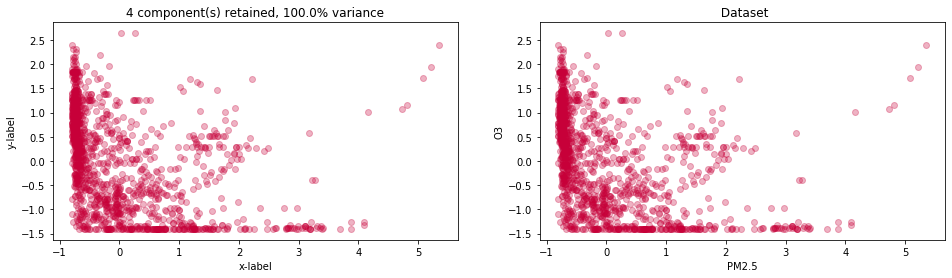

In [40]:
r = air_data.shape[1]
var_explained = np.cumsum(s**2)/np.sum(s**2)*100;

# You can change the features you would like to display, from 0 to 10
# ["PM2.5","PM10","NO2","O3"]

f1=0   #pm2.5
f2=3   #o3

approx = []
for n in range(1,r+1):
    approximation = np.dot((u[:,:n] * s[:n]),vh[:n,:]) 
    
    approx.append(approximation)
    
    fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))
    
    sns.regplot(x=approximation[:,f1],
                y=approximation[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax1)
    ax1.set(xlabel= 'x-label', 
           ylabel= 'y-label',
           title= (str(n) 
                   + ' component(s) retained, ' 
                   + str(round(var_explained[n-1],2)) 
                   + '% variance'))
    

    sns.regplot(x=np.array(air_data)[:,f1],
                y=np.array(air_data)[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax2)
    ax2.set(xlabel='PM2.5', 
           ylabel= 'O3',
           title=' Dataset');

## Hidden factor model

In [61]:
# z: hidden factor 
# c : loading

z, mu, c = np.linalg.svd(air_data, full_matrices=True)
ds = np.sum(np.sum(air_data.T @ air_data))

print("z: ", z.shape)
print("mu: " , mu.shape)
print("ds: ", ds)

contributions = [mu[i]**2 / ds for i in range(len(mu))]
for i in range(len(mu)):
    print("component ", i, ": influence: ", np.round(contributions[i]*100 ,2), " %")


z:  (1361, 1361)
mu:  (4,)
ds:  8231.501000084849
component  0 : influence:  50.71  %
component  1 : influence:  12.81  %
component  2 : influence:  2.36  %
component  3 : influence:  0.21  %


In [59]:
# calculate new hidden factor and loading by multiplying it with the sqrt of the maximum singular value --> formula slides
mu_max = mu[0]
mu_sqrt = np.sqrt(mu[0])
z_new = np.expand_dims(z[:,0] * mu_sqrt, axis=1)
c_new = np.expand_dims(c[:,0] * mu_sqrt, axis=1)

In [58]:
# calcualte the model, derive the residuals as difference between model and obversed data
model = z_new @ c_new.T
residuals = air_data - model
residuals

,PM2.5,PM10,NO2,O3
0,0.872611,1.484798,0.284152,2.075603
1,0.871078,1.541300,0.132303,1.982931
2,0.807357,1.402117,0.137870,1.797505
3,0.694453,1.173470,0.166731,1.494332
4,0.712430,1.424790,0.419004,2.108692
...,...,...,...,...
1356,0.175018,-0.028203,-0.367936,0.239325
1357,0.008917,-0.084814,-0.211080,0.045088
1358,-0.253281,-0.289092,0.147189,-0.272526
1359,-0.519637,-0.449758,0.497580,-0.560772


##### try to make sense of this...

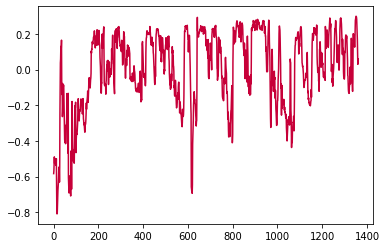

In [48]:
plt.plot(z_new)

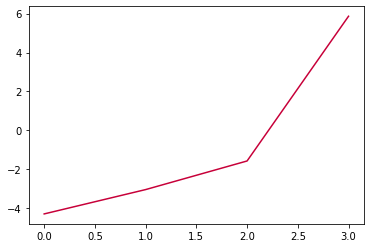

In [49]:
plt.plot(c_new)

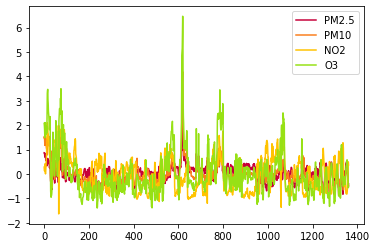

In [50]:
plt.plot(residuals)
plt.legend(cols)

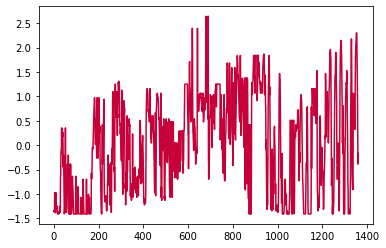

In [51]:
plt.plot(air_data["O3"])